# Exploratory Data Analysis on Google Play Store Apps Data

The main objective of this project is to perform an EDA on Google Play Store Apps dataset taken from www.kaggle.com inorder to draw insights about the trends that are followed by the Applications present on Google Playstore. 

Importing the Libraries required for this EDA.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset .csv file

apps_df = pd.read_csv('googleplaystore.csv')

Displaying the Dataset to see the columns and the number of records available.

In [3]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


We can see that in total we have 10841 records with 13 features.

In [4]:
# Getting the information about the Dataset
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


## Data Preprocessing and Cleaning

Removing '+' from the values of number of installs and Removing '$' from the values of Price. Converting Installs, Price and Review to numeric values.

In [5]:
# Installs feature
apps_df['Installs'] = apps_df['Installs'].map(lambda x: x.rstrip('+'))
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'].str.replace(',',''))

# Price feature
apps_df['Price'] = pd.to_numeric(apps_df['Price'].str.replace('$',''))

# Reviews
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'])

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [6]:
# We can see that the Installs, Price and Reviews Dtypes have been updated
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [7]:
# To check for any duplicate entries for parrticular application
apps_df.App.value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [8]:
apps_df[apps_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


It can be seen that we have duplicates for many applications so we need to to remove this redundant datafrom the dataset by considering the record with maximum reviews as the latest.

In [9]:
apps_df = apps_df.groupby('App', group_keys=False).apply(lambda x: x.loc[x.Reviews.idxmax()])

In [10]:
apps_df.App.value_counts()

"i DT" Fútbol. Todos Somos Técnicos.                 1
My Talking Tom                                       1
My Teacher - Classroom Play                          1
My Telcel                                            1
My Tele2                                             1
                                                    ..
Delivery trough - delivery trough delivery trough    1
Delivery yogi.                                       1
Delta Dental                                         1
Denis Brogniart - AH !                               1
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍     1
Name: App, Length: 9659, dtype: int64

## Exploratory Data Analysis

We will drawing insights based on following business questions:

1. What are the top 10 Genres present in the google play store based on the count of Apps present?
2. Which are the Genres that are getting installed the most?
3. What is the Average rating trend on Google Play Store?
4. What are the count of applications in each category based on Free or Paid?
5. How does application size impacts number of installs?

### Q-1. What are the top 10 Genres present in the google play store based on the count of Apps present?

In [11]:
top_genres = apps_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = apps_df.groupby(['Genres'])[['Installs']].sum()

In [12]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')

In [13]:
top_genres_installs

,Genres,Count,Installs
0,Tools,828,8092771915
1,Entertainment,561,3014714684
2,Education,510,262910148
3,Business,420,697164865
4,Medical,395,38293077
...,...,...,...
113,Health & Fitness;Action & Adventure,1,1000000
114,Art & Design;Pretend Play,1,500000
115,Travel & Local;Action & Adventure,1,100000
116,Trivia;Education,1,100


There are in total 118 different Genre Applications present in Google Play Store.

In [14]:
# Getting the Top 10 Genres
top_10 = top_genres_installs.head(10)

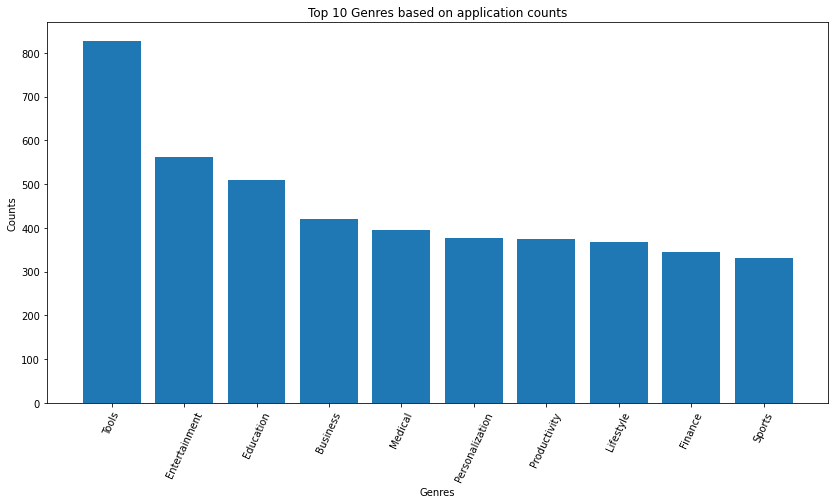

In [15]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Counts")
plt.title("Top 10 Genres based on application counts")
plt.bar(top_10.Genres, top_10.Count)
plt.show()

### Q-2. Which are the Genres that are getting installed the most?

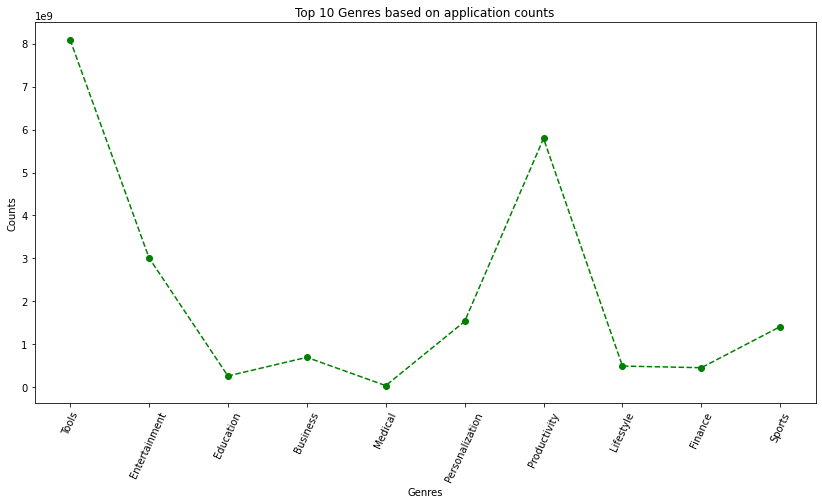

In [16]:
# it can be shown by using the top_10 Dataframe

plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Counts")
plt.title("Top 10 Genres based on application counts")
plt.plot(top_10.Genres, top_10.Installs,color = 'green', marker = 'o', linestyle = 'dashed')
plt.show()

It can be seen that the Y axis values are very big in numbers so we are getting scaled values, we can scale them on log scale inorder to reduce variance.

### Q-3. What is the Average rating trend on Google Play Store?

In [17]:
ratings = apps_df.groupby(['Genres'])[['Rating']].mean()
genres_ratings = pd.merge(top_genres_installs, ratings, on='Genres')

In [18]:
genres_ratings

,Genres,Count,Installs,Rating
0,Tools,828,8092771915,4.039638
1,Entertainment,561,3014714684,4.083439
2,Education,510,262910148,4.290909
3,Business,420,697164865,4.098479
4,Medical,395,38293077,4.165862
...,...,...,...,...
113,Health & Fitness;Action & Adventure,1,1000000,3.900000
114,Art & Design;Pretend Play,1,500000,3.900000
115,Travel & Local;Action & Adventure,1,100000,4.100000
116,Trivia;Education,1,100,NaN


Here we are able to get the average ratings based on each Genre which we can visualize a Distribution Density plot to get a better understanding.

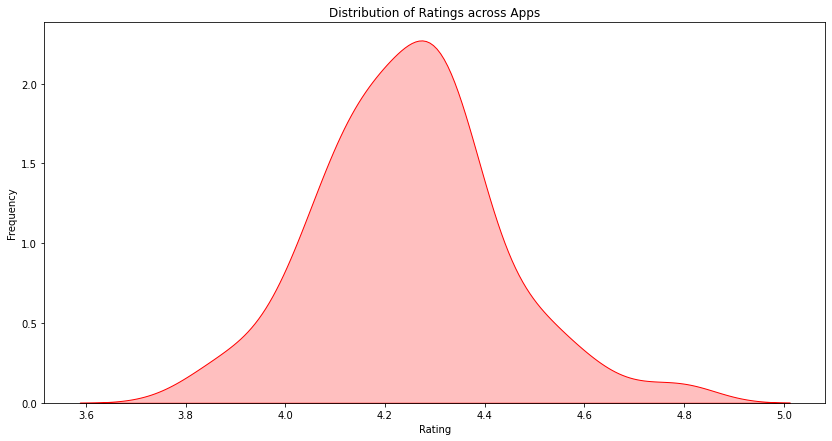

In [19]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_ratings.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Ratings across Apps')
plt.show()

Here it can be clearly seen that the majority of the applications in Google Play Store have Ratings between 4.0 to 4.5, only a small number of applications are beyond this range. 

### Q-4. What are the count of applications in each category based on Free or Paid?

In [20]:
app_type_count = apps_df.groupby(['Category','Type'])['App'].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [21]:
app_count = app_type_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

In [22]:
app_count.head()

Type,Category,Free,Paid
0,ART_AND_DESIGN,58.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0


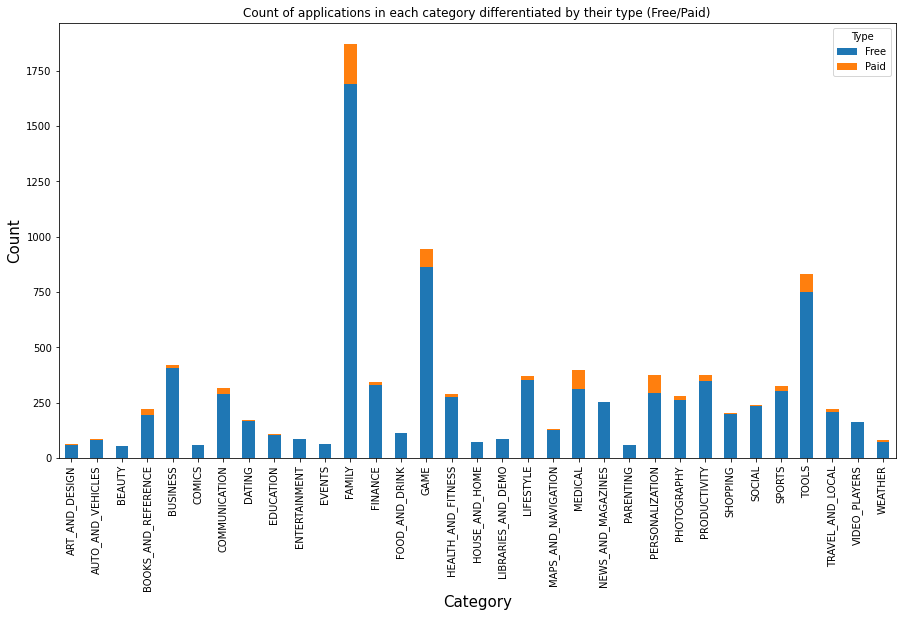

In [23]:
# Visualizing the Category wise data Graphically

app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(15,8))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type (Free/Paid)")
plt.show()

### Q-5. How does application size impacts number of installs?

In [24]:
apps_df['Installs'] = np.log(apps_df['Installs'])

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
apps_df['Size'].unique()

array(['3.6M', '9.1M', '22M', '203k', '53M', '14M', '41M', '3.8M', '48M',
       '3.5M', '1.6M', '5.0M', '25M', '20M', '15M', '29M', '1.4M', '26M',
       '10M', '31M', '13M', 'Varies with device', '2.0M', '2.4M', '3.7M',
       '38M', '39M', '6.3M', '5.1M', '42M', '8.1M', '30M', '32M', '40M',
       '7.6M', '371k', '17M', '24M', '7.4M', '37M', '69M', '28M', '21M',
       '7.3M', '56M', '2.5M', '2.3M', '4.1M', '243k', '11M', '2.9M',
       '54M', '8.4M', '8.0M', '6.8M', '52M', '6.1M', '9.0M', '1.2M',
       '4.3M', '23M', '67M', '16M', '68M', '8.8M', '19M', '239k', '4.4M',
       '33M', '2.1M', '3.0M', '5.7M', '18M', '8.2M', '35M', '91M', '1.8M',
       '3.2M', '3.1M', '9.7M', '1.7M', '3.4M', '27M', '4.2M', '7.7M',
       '4.5M', '45M', '2.8M', '78k', '6.6M', '66M', '12M', '4.0M', '317k',
       '9.2M', '902k', '924k', '62M', '2.7M', '47M', '8.7M', '81k', '59M',
       '86M', '99M', '3.3M', '5.3M', '45k', '169k', '3.9M', '475k',
       '7.0M', '5.8M', '71M', '72M', '46M', '9.9M', '96M'

It can be Clearly seen that we have different types of values for Size that we need to handle and make data in Size feature uniform.

In [26]:
# Cleaning Size data and Converting KB data to MB 
apps_df['Size'] = apps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
apps_df['Size'] = apps_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
apps_df['Size'] = apps_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
apps_df['Size'] = apps_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
apps_df['Size'] = apps_df['Size'].apply(lambda x: float(x))

c:\users\prank\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


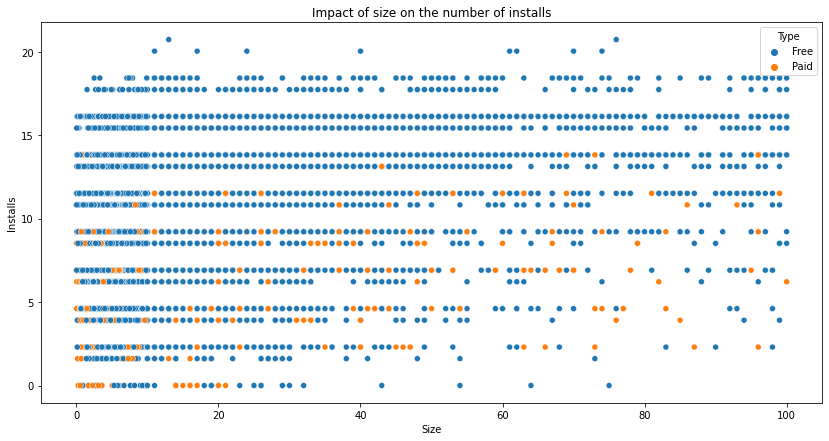

In [27]:
# Visualizing the relation of size and installs Graphically.

plt.figure(figsize=(14,7))
plt.title("Impact of size on the number of installs")
sns.scatterplot(apps_df['Size'], apps_df['Installs'], hue = apps_df['Type'])
plt.show()

### Conclusion

As we saw that there can be multiple insights that can drawn from this Google Play Store Data which can be used to plan inorder to leverage and get a better performance as compared to other applications.